#### Blackwell's Books - Discriptive Analysis

#### Importing the libraries and loading the data

In [292]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib as mat
#Define how many rows is will display
pd.options.display.max_rows = 13000

In [155]:
def upload_data():
    bookstore_df = pd.read_csv('data/blackwell_shop_cleaned-2.csv')
    return bookstore_df

In [156]:
bookstore_df = upload_data()

In [157]:
bookstore_df

,isbn,publication_date,euro_price,discount_euro,type,category,link_book_page,name,subtitle,edition,...,language,no_of_pages,height,width,spine,weight,salesRank,short_blurb,long_blurb,blurbReview
0,9781780724379,08 Oct 2020,13.63,2.92,Hardback,artanddesign,/bookshop/product/Secrets-of-a-Devon-Wood-by-J...,Secrets of a Devon Wood,A Nature Journal,NaN,...,English,96,242.0,218.0,18.0,390,108.0,Walking one day in the woods behind her cottag...,"<p><b>""Things of such magnitude deserve respec...",<b>Exquisite drawings and thoughtful annotatio...
1,9780141992150,05 Nov 2020,11.03,NaN,Paperback,artanddesign,/bookshop/product/Poor-by-Caleb-Femi-author/97...,Poor,NaN,NaN,...,English,140,130.0,197.0,16.0,258,167.0,What is it like to grow up in a place where th...,<p><b>A <i>NEW STATESMAN</i> AND <i>FINANCIAL ...,<b>It&#39;s rare for a book of poems to repeat...
2,9781250114297,06 Oct 2020,32.97,NaN,Hardback,artanddesign,/bookshop/product/Humans-by-Brandon-Stanton-au...,Humans,NaN,First edition,...,NaN,cm,214.0,261.0,36.0,1628,63.0,"""Brandon Stanton's new book, Humans ... shows ...",NaN,NaN
3,9781846149481,05 Nov 2020,19.11,2.97,Hardback,artanddesign,/bookshop/product/Gamish-by-Edward-Ross-author...,Gamish,A Graphic History of Gaming,NaN,...,English,208,171.0,235.0,22.0,616,285.0,Pac-Man. Mario. Minecraft. Doom. Ever since he...,<p><b>'A love letter to gaming in all its form...,<i>Gamish</i> is a <b>fascinating </b>read. <b...
4,9780241472859,24 Sep 2020,4.25,2.36,Paperback,artanddesign,/bookshop/product/The-Narrative-of-Trajans-Col...,The Narrative of Trajan's Column,NaN,NaN,...,English,112,111.0,180.0,11.0,74,2645.0,"Taken from his 'Collection of Sand', these ess...","<p><b><i>'When the last fire goes out, time to...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,9781250038821,15 Oct 2013,25.32,NaN,Hardback,travel,/bookshop/product/Humans-of-New-York-by-Brando...,Humans of New York,NaN,NaN,...,English,NaN,236.0,184.0,31.0,976,1792.0,STOP PRESS MARCH 2014,NaN,NaN
11569,9781910240755,04 Oct 2018,19.83,0.03,Paperback,travel,/bookshop/product/Waymaking-by-Helen-Mort-edit...,Waymaking,"An Anthology of Women's Adventure Writing, Poe...",NaN,...,English,256,219.0,184.0,25.0,750,31932.0,"Waymaking is an anthology of prose, poetry and...",<p><strong>Winner: Mountain Literature (Non Fi...,NaN
11570,9781910702390,02 Aug 2018,25.10,2.51,Hardback,travel,/bookshop/product/Red-Thread-by-Charlotte-Higg...,Red Thread,On Mazes and Labyrinths,NaN,...,English,216,251.0,191.0,24.0,962,33708.0,The tale of how the hero Theseus killed the Mi...,<p><b>'Charlotte Higgins's <i>Red Thread</i> i...,<b>Charlotte Higgins&#39;s <i>Red Thread</i> i...
11571,9781912177059,03 Oct 2017,11.39,1.85,Paperback,travel,/bookshop/product/Sailing-Around-Britain-by-Ki...,Sailing Around Britain,NaN,Second edition,...,English,"240 , 8 unnumbered of plates",130.0,198.0,19.0,242,NaN,An inspiring personal narrative of a weekend s...,Kim Sturgess was a weekend sailor: he enjoyed ...,"""Sail the glorious and challenging coast of Br..."


Standardizing the heading

In [158]:
bookstore_df.columns

Index(['isbn', 'publication_date', 'euro_price', 'discount_euro', 'type',
       'category', 'link_book_page', 'name', 'subtitle', 'edition', 'author',
       'gbp_price', 'discount_gbp', 'isSecondHand', 'publisher',
       'published_country', 'imprint', 'language', 'no_of_pages', 'height',
       'width', 'spine', 'weight', 'salesRank', 'short_blurb', 'long_blurb',
       'blurbReview'],
      dtype='object')

In [159]:
def rename_columns(bookstore_df):
    bookstore_df = bookstore_df.rename(columns={"isSecondHand":"second_hand", "category":"genre", "name":"title", "no_of_pages":"number_of_pages", "salesRank":"sales_rank", "blurbReview":"blurb_review"})
    return bookstore_df

In [160]:
bookstore_df = rename_columns(bookstore_df)

In [161]:
bookstore_df.columns

Index(['isbn', 'publication_date', 'euro_price', 'discount_euro', 'type',
       'genre', 'link_book_page', 'title', 'subtitle', 'edition', 'author',
       'gbp_price', 'discount_gbp', 'second_hand', 'publisher',
       'published_country', 'imprint', 'language', 'number_of_pages', 'height',
       'width', 'spine', 'weight', 'sales_rank', 'short_blurb', 'long_blurb',
       'blurb_review'],
      dtype='object')

#### Exploring the data

Check the datatype

In [162]:
bookstore_df.dtypes

isbn                   int64
publication_date      object
euro_price           float64
discount_euro        float64
type                  object
genre                 object
link_book_page        object
title                 object
subtitle              object
edition               object
author                object
gbp_price            float64
discount_gbp         float64
second_hand             bool
publisher             object
published_country     object
imprint               object
language              object
number_of_pages       object
height               float64
width                float64
spine                float64
weight                 int64
sales_rank           float64
short_blurb           object
long_blurb            object
blurb_review          object
dtype: object

In [163]:
# The column 'number of pages' has a wrong datatype, it should be integer not object

In [164]:
#Get the number of rows and columns
bookstore_df.shape

(11573, 27)

In [165]:
print(bookstore_df.head())

            isbn publication_date  euro_price  discount_euro        type  \
0  9781780724379      08 Oct 2020       13.63           2.92   Hardback    
1  9780141992150      05 Nov 2020       11.03            NaN  Paperback    
2  9781250114297      06 Oct 2020       32.97            NaN   Hardback    
3  9781846149481      05 Nov 2020       19.11           2.97   Hardback    
4  9780241472859      24 Sep 2020        4.25           2.36  Paperback    

          genre                                     link_book_page  \
0  artanddesign  /bookshop/product/Secrets-of-a-Devon-Wood-by-J...   
1  artanddesign  /bookshop/product/Poor-by-Caleb-Femi-author/97...   
2  artanddesign  /bookshop/product/Humans-by-Brandon-Stanton-au...   
3  artanddesign  /bookshop/product/Gamish-by-Edward-Ross-author...   
4  artanddesign  /bookshop/product/The-Narrative-of-Trajans-Col...   

                              title                     subtitle  \
0           Secrets of a Devon Wood             A Natu

### Numberical variables

In [166]:
def create_numerical_df():
    numerical = bookstore_df.select_dtypes(include = np.number)
    return numerical

In [167]:
numerical = create_numerical_df()

In [168]:
numerical

,isbn,euro_price,discount_euro,gbp_price,discount_gbp,height,width,spine,weight,sales_rank
0,9781780724379,13.63,2.92,10.40,4.59,242.0,218.0,18.0,390,108.0
1,9780141992150,11.03,NaN,9.99,0.00,130.0,197.0,16.0,258,167.0
2,9781250114297,32.97,NaN,22.37,4.62,214.0,261.0,36.0,1628,63.0
3,9781846149481,19.11,2.97,13.99,6.01,171.0,235.0,22.0,616,285.0
4,9780241472859,4.25,2.36,3.68,2.31,111.0,180.0,11.0,74,2645.0
...,...,...,...,...,...,...,...,...,...,...
11568,9781250038821,25.32,NaN,18.99,3.00,236.0,184.0,31.0,976,1792.0
11569,9781910240755,19.83,0.03,14.99,3.00,219.0,184.0,25.0,750,31932.0
11570,9781910702390,25.10,2.51,18.73,6.27,251.0,191.0,24.0,962,33708.0
11571,9781912177059,11.39,1.85,9.16,2.83,130.0,198.0,19.0,242,NaN


array([[<AxesSubplot:title={'center':'isbn'}>,
        <AxesSubplot:title={'center':'euro_price'}>,
        <AxesSubplot:title={'center':'discount_euro'}>],
       [<AxesSubplot:title={'center':'gbp_price'}>,
        <AxesSubplot:title={'center':'discount_gbp'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'spine'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'sales_rank'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

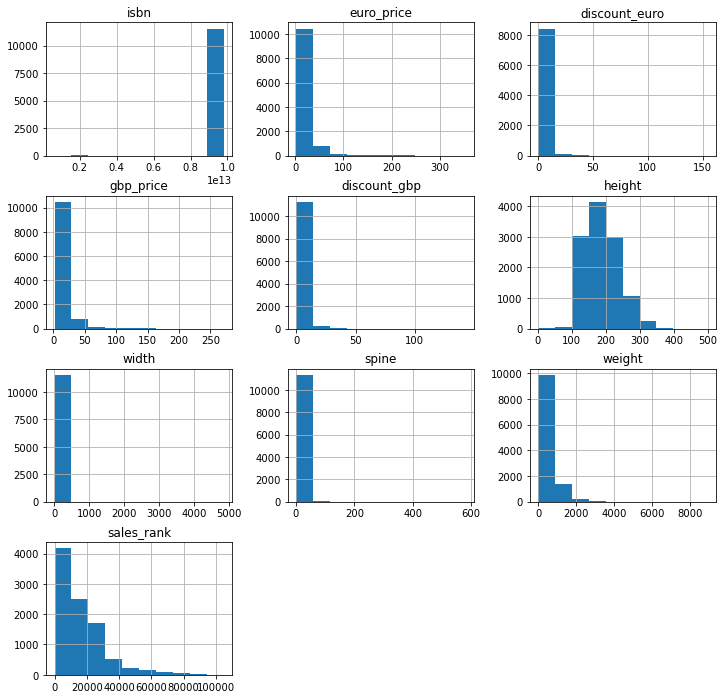

In [169]:
numerical.hist(figsize=(12,12))

#### Checking the nan values for the numerical variables

In [170]:
null_numerical=numerical.columns[numerical.isnull().any()]

In [171]:
null_numerical

Index(['euro_price', 'discount_euro', 'height', 'width', 'spine',
       'sales_rank'],
      dtype='object')

In [172]:
numerical[null_numerical].isnull().sum()

euro_price         23
discount_euro    3050
height              4
width               5
spine              82
sales_rank       2109
dtype: int64

##### Let's check every column and replace the nan values if possible

1. euro_price

In [173]:
numerical['euro_price'] 

0        13.63
1        11.03
2        32.97
3        19.11
4         4.25
         ...  
11568    25.32
11569    19.83
11570    25.10
11571    11.39
11572    31.62
Name: euro_price, Length: 11573, dtype: float64

In [174]:
# In the case of the missing euro_price values, we can replace them compared to the price in pound. 
#It just replaced it with the pound value, not the calculation
bookstore_df.euro_price = bookstore_df.euro_price.fillna(bookstore_df.gbp_price)

In [175]:
numerical['euro_price'].unique().tolist()

[13.63,
 11.03,
 32.97,
 19.11,
 4.25,
 17.39,
 17.46,
 19.37,
 12.02,
 21.39,
 20.9,
 9.91,
 13.78,
 6.21,
 32.51,
 16.55,
 41.68,
 45.84,
 44.15,
 29.43,
 26.03,
 30.64,
 16.32,
 23.99,
 28.97,
 9.87,
 34.41,
 35.6,
 43.27,
 7.6,
 33.07,
 24.35,
 18.29,
 10.59,
 25.31,
 19.87,
 7.23,
 26.7,
 19.24,
 23.05,
 27.53,
 28.47,
 18.16,
 58.36,
 9.72,
 24.78,
 30.88,
 8.94,
 10.71,
 9.88,
 23.39,
 9.9,
 9.66,
 22.68,
 19.17,
 8.34,
 10.15,
 16.66,
 32.49,
 17.88,
 16.39,
 17.48,
 24.27,
 8.63,
 30.44,
 25.03,
 50.93,
 45.48,
 19.15,
 7.61,
 7.86,
 24.5,
 34.42,
 19.61,
 29.3,
 54.31,
 49.99,
 8.37,
 32.76,
 171.4,
 37.72,
 28.13,
 45.34,
 14.1,
 38.94,
 29.68,
 22.33,
 24.71,
 36.33,
 11.62,
 31.55,
 22.5,
 48.31,
 27.3,
 28.46,
 15.46,
 23.92,
 51.79,
 31.64,
 10.05,
 23.8,
 25.06,
 16.56,
 44.55,
 74.71,
 60.66,
 53.22,
 15.99,
 10.7,
 34.36,
 31.81,
 16.65,
 25.5,
 46.51,
 36.37,
 14.46,
 44.75,
 28.36,
 22.79,
 9.83,
 14.92,
 27.44,
 17.74,
 13.51,
 13.98,
 50.4,
 3.16,
 15.36,
 23.95,


In [176]:
numerical['euro_price'].isnull().sum()

23

In [177]:
bookstore_df['euro_price'].isnull().sum()

0

<AxesSubplot:>

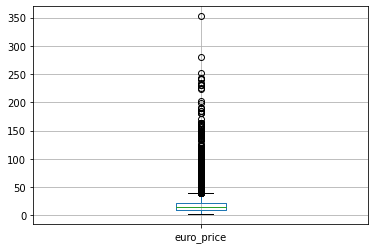

In [178]:
numerical.boxplot(column = 'euro_price', return_type = 'axes')

2. discount_euro

In [179]:
#Does the NaN values of the discount_euro means there is no discount or are they missing?
numerical['discount_euro']

0        2.92
1         NaN
2         NaN
3        2.97
4        2.36
         ... 
11568     NaN
11569    0.03
11570    2.51
11571    1.85
11572    7.02
Name: discount_euro, Length: 11573, dtype: float64

In [180]:
#Check if the NaN represents the 0.0 value by looking for 0.0
zero_discount = numerical['discount_euro'] == 0
zero_discount.sum()

0

We have 0 Zeros, so we can assume there is no discount.
In this case we can replace the NaN with 0.0 later.

In [181]:
#Let's compare it with the discount_gbp to be sure, here we see 0.0 when there is no discount
numerical['discount_gbp']

0         4.59
1         0.00
2         4.62
3         6.01
4         2.31
         ...  
11568     3.00
11569     3.00
11570     6.27
11571     2.83
11572    10.68
Name: discount_gbp, Length: 11573, dtype: float64

Replace nan values in the discount_euro with 0.0

In [182]:
bookstore_df['discount_euro'].fillna(0, inplace = True)

In [183]:
#Check if there still NaN values
numerical['discount_euro'].isnull().sum()

3050

In [184]:
bookstore_df['discount_euro'].isnull().sum()

0

In [185]:
numerical['discount_euro']

0        2.92
1         NaN
2         NaN
3        2.97
4        2.36
         ... 
11568     NaN
11569    0.03
11570    2.51
11571    1.85
11572    7.02
Name: discount_euro, Length: 11573, dtype: float64

3. height, width and spine

In [186]:
# We can replace the missing value with mean, median or mode, if it makes sense

In [187]:
numerical['height'].mean()

188.83810182383957

In [188]:
bookstore_df['height'].fillna(189, inplace = True)

In [189]:
bookstore_df['height'].isnull().sum()


0

In [190]:
bookstore_df['width'].mean()

200.6262102351314

In [191]:
bookstore_df['width'].isnull().sum()

5

In [192]:
bookstore_df['width'].fillna(200, inplace = True)

In [193]:
bookstore_df['width'].isnull().sum()

0

In [194]:
# Looks like an outlier, 
numerical['spine'].max()

580.0

<AxesSubplot:>

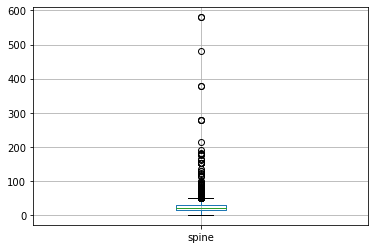

In [195]:
numerical.boxplot(column = 'spine', return_type = 'axes')

In [196]:
numerical['spine'].min()

1.0

In [197]:
numerical['spine'].mean()

23.43460099208076

In [198]:
# Replacing the missing value with the mean
bookstore_df['spine'].fillna(23, inplace = True)

In [199]:
bookstore_df['spine'].isnull().sum()

0

4. sales rank

In [200]:
numerical['sales_rank']

0          108.0
1          167.0
2           63.0
3          285.0
4         2645.0
          ...   
11568     1792.0
11569    31932.0
11570    33708.0
11571        NaN
11572        NaN
Name: sales_rank, Length: 11573, dtype: float64

array([[<AxesSubplot:title={'center':'sales_rank'}>]], dtype=object)

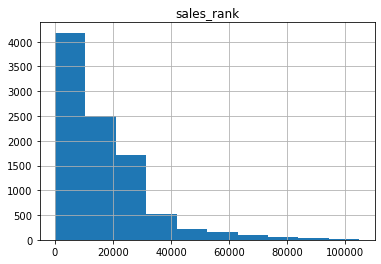

In [201]:
numerical.hist(column='sales_rank')

In [202]:
numerical['sales_rank'].isnull().sum()

2109

In [203]:
numerical['sales_rank'].mean()

16208.01849112426

In [204]:
numerical['sales_rank'].median()

12522.0

In [205]:
numerical['sales_rank'].mode()

0    26271.0
1    26917.0
2    29792.0
dtype: float64

In [206]:
bookstore_df[['publication_date','author', 'title', 'sales_rank']]

,publication_date,author,title,sales_rank
0,08 Oct 2020,Jo Brown (author),Secrets of a Devon Wood,108.0
1,05 Nov 2020,Caleb Femi (author),Poor,167.0
2,06 Oct 2020,Brandon Stanton (author),Humans,63.0
3,05 Nov 2020,Edward Ross (author),Gamish,285.0
4,24 Sep 2020,Italo Calvino (author),The Narrative of Trajan's Column,2645.0
...,...,...,...,...
11568,15 Oct 2013,Brandon Stanton (photographer),Humans of New York,1792.0
11569,04 Oct 2018,"Helen Mort (editor), Claire Carter (editor), H...",Waymaking,31932.0
11570,02 Aug 2018,Charlotte Higgins (author),Red Thread,33708.0
11571,03 Oct 2017,Kim C. Sturgess (author),Sailing Around Britain,NaN


In [207]:
numerical['sales_rank'].max()

104749.0

In [208]:
bookstore_df['sales_rank'].fillna(0, inplace = True)

In [209]:
bookstore_df['sales_rank'].isnull().sum()

0

array([[<AxesSubplot:title={'center':'sales_rank'}>]], dtype=object)

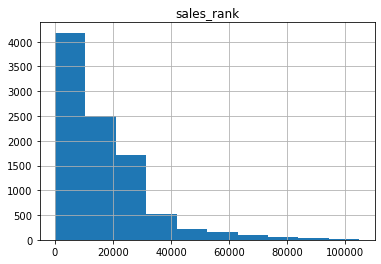

In [210]:
numerical.hist(column='sales_rank')

In [211]:
numerical['sales_rank'].mean()

16208.01849112426

In [212]:
numerical.columns[numerical.isnull().any()]

Index(['euro_price', 'discount_euro', 'height', 'width', 'spine',
       'sales_rank'],
      dtype='object')

### Categorical variables

In [213]:
def create_categorical_df():
    categoricals = bookstore_df.select_dtypes('object')
    return categoricals

In [214]:
categoricals = create_categorical_df()

In [215]:
categoricals

,publication_date,type,genre,link_book_page,title,subtitle,edition,author,publisher,published_country,imprint,language,number_of_pages,short_blurb,long_blurb,blurb_review
0,08 Oct 2020,Hardback,artanddesign,/bookshop/product/Secrets-of-a-Devon-Wood-by-J...,Secrets of a Devon Wood,A Nature Journal,NaN,Jo Brown (author),Short Books,England,Short Books,English,96,Walking one day in the woods behind her cottag...,"<p><b>""Things of such magnitude deserve respec...",<b>Exquisite drawings and thoughtful annotatio...
1,05 Nov 2020,Paperback,artanddesign,/bookshop/product/Poor-by-Caleb-Femi-author/97...,Poor,NaN,NaN,Caleb Femi (author),Penguin Books Ltd,United Kingdom,Penguin Books,English,140,What is it like to grow up in a place where th...,<p><b>A <i>NEW STATESMAN</i> AND <i>FINANCIAL ...,<b>It&#39;s rare for a book of poems to repeat...
2,06 Oct 2020,Hardback,artanddesign,/bookshop/product/Humans-by-Brandon-Stanton-au...,Humans,NaN,First edition,Brandon Stanton (author),St. Martin's Press,New York (State),St. Martin's Press,NaN,cm,"""Brandon Stanton's new book, Humans ... shows ...",NaN,NaN
3,05 Nov 2020,Hardback,artanddesign,/bookshop/product/Gamish-by-Edward-Ross-author...,Gamish,A Graphic History of Gaming,NaN,Edward Ross (author),Penguin Books Ltd,England,Particular Books,English,208,Pac-Man. Mario. Minecraft. Doom. Ever since he...,<p><b>'A love letter to gaming in all its form...,<i>Gamish</i> is a <b>fascinating </b>read. <b...
4,24 Sep 2020,Paperback,artanddesign,/bookshop/product/The-Narrative-of-Trajans-Col...,The Narrative of Trajan's Column,NaN,NaN,Italo Calvino (author),Penguin Books Ltd,England,Penguin Classics,English,112,"Taken from his 'Collection of Sand', these ess...","<p><b><i>'When the last fire goes out, time to...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,15 Oct 2013,Hardback,travel,/bookshop/product/Humans-of-New-York-by-Brando...,Humans of New York,NaN,NaN,Brandon Stanton (photographer),St. Martin's Press,New York (State),St. Martin's Press,English,NaN,STOP PRESS MARCH 2014,NaN,NaN
11569,04 Oct 2018,Paperback,travel,/bookshop/product/Waymaking-by-Helen-Mort-edit...,Waymaking,"An Anthology of Women's Adventure Writing, Poe...",NaN,"Helen Mort (editor), Claire Carter (editor), H...",Vertebrate Publishing,England,Vertebrate Publishing,English,256,"Waymaking is an anthology of prose, poetry and...",<p><strong>Winner: Mountain Literature (Non Fi...,NaN
11570,02 Aug 2018,Hardback,travel,/bookshop/product/Red-Thread-by-Charlotte-Higg...,Red Thread,On Mazes and Labyrinths,NaN,Charlotte Higgins (author),Random House,England,Jonathan Cape,English,216,The tale of how the hero Theseus killed the Mi...,<p><b>'Charlotte Higgins's <i>Red Thread</i> i...,<b>Charlotte Higgins&#39;s <i>Red Thread</i> i...
11571,03 Oct 2017,Paperback,travel,/bookshop/product/Sailing-Around-Britain-by-Ki...,Sailing Around Britain,NaN,Second edition,Kim C. Sturgess (author),Fernhurst Books Limited,England,Fernhurst Books,English,"240 , 8 unnumbered of plates",An inspiring personal narrative of a weekend s...,Kim Sturgess was a weekend sailor: he enjoyed ...,"""Sail the glorious and challenging coast of Br..."


#### Checking the nan values for the categorical variables

In [216]:
null_cat=categoricals.columns[categoricals.isnull().any()]

In [217]:
null_cat

Index(['publication_date', 'type', 'subtitle', 'edition', 'author',
       'publisher', 'published_country', 'imprint', 'language',
       'number_of_pages', 'short_blurb', 'long_blurb', 'blurb_review'],
      dtype='object')

In [218]:
categoricals[null_cat].isnull().sum()

publication_date        3
type                    2
subtitle             6064
edition              7204
author                 51
publisher               5
published_country     300
imprint                 4
language              686
number_of_pages       485
short_blurb           374
long_blurb            584
blurb_review         6395
dtype: int64

1. publication_date

In [219]:
# We have to replace the missing values with the most frequent value - mode
bookstore_df['publication_date'].mode()

0    01 Oct 2020
dtype: object

In [220]:
# Replacing the missing value with the mode
#bookstore_df['publication_date] = 
bookstore_df['publication_date'].fillna('01 Oct 2020', inplace=True)

In [221]:
bookstore_df['publication_date'].isnull().sum()

0

2. type

In [277]:
categoricals['type'].mode()
bookstore_df['type'].fillna('Paperback', inplace=True)

In [278]:
bookstore_df['type'].isnull().sum()

0

3. subtitle

In [223]:
categoricals[['subtitle', 'title', 'author', 'number_of_pages']]

,subtitle,title,author,number_of_pages
0,A Nature Journal,Secrets of a Devon Wood,Jo Brown (author),96
1,NaN,Poor,Caleb Femi (author),140
2,NaN,Humans,Brandon Stanton (author),cm
3,A Graphic History of Gaming,Gamish,Edward Ross (author),208
4,NaN,The Narrative of Trajan's Column,Italo Calvino (author),112
...,...,...,...,...
11568,NaN,Humans of New York,Brandon Stanton (photographer),NaN
11569,"An Anthology of Women's Adventure Writing, Poe...",Waymaking,"Helen Mort (editor), Claire Carter (editor), H...",256
11570,On Mazes and Labyrinths,Red Thread,Charlotte Higgins (author),216
11571,NaN,Sailing Around Britain,Kim C. Sturgess (author),"240 , 8 unnumbered of plates"


In [224]:
# We have to check if nan means there is no subtitle? - 52 percent
categoricals['subtitle'].isnull().mean()

0.5239782251792966

In [275]:
# Replace it with ''
bookstore_df.subtitle = bookstore_df.subtitle.fillna('')

In [279]:
bookstore_df.isnull().sum()

isbn                 0
publication_date     0
euro_price           0
discount_euro        0
type                 0
genre                0
link_book_page       0
title                0
subtitle             0
author               0
gbp_price            0
discount_gbp         0
second_hand          0
publisher            0
published_country    0
imprint              0
language             0
number_of_pages      0
height               0
width                0
spine                0
weight               0
sales_rank           0
short_blurb          0
long_blurb           0
blurb_review         0
dtype: int64

4. edition

In [226]:
# 62% missing values - we have to drop the column
categoricals['edition'].isnull().mean()

0.6224833664564071

In [227]:
bookstore_df = bookstore_df.drop('edition', axis=1)

In [228]:
bookstore_df

,isbn,publication_date,euro_price,discount_euro,type,genre,link_book_page,title,subtitle,author,...,language,number_of_pages,height,width,spine,weight,sales_rank,short_blurb,long_blurb,blurb_review
0,9781780724379,08 Oct 2020,13.63,2.92,Hardback,artanddesign,/bookshop/product/Secrets-of-a-Devon-Wood-by-J...,Secrets of a Devon Wood,A Nature Journal,Jo Brown (author),...,English,96,242.0,218.0,18.0,390,108.0,Walking one day in the woods behind her cottag...,"<p><b>""Things of such magnitude deserve respec...",<b>Exquisite drawings and thoughtful annotatio...
1,9780141992150,05 Nov 2020,11.03,0.00,Paperback,artanddesign,/bookshop/product/Poor-by-Caleb-Femi-author/97...,Poor,NaN,Caleb Femi (author),...,English,140,130.0,197.0,16.0,258,167.0,What is it like to grow up in a place where th...,<p><b>A <i>NEW STATESMAN</i> AND <i>FINANCIAL ...,<b>It&#39;s rare for a book of poems to repeat...
2,9781250114297,06 Oct 2020,32.97,0.00,Hardback,artanddesign,/bookshop/product/Humans-by-Brandon-Stanton-au...,Humans,NaN,Brandon Stanton (author),...,NaN,cm,214.0,261.0,36.0,1628,63.0,"""Brandon Stanton's new book, Humans ... shows ...",NaN,NaN
3,9781846149481,05 Nov 2020,19.11,2.97,Hardback,artanddesign,/bookshop/product/Gamish-by-Edward-Ross-author...,Gamish,A Graphic History of Gaming,Edward Ross (author),...,English,208,171.0,235.0,22.0,616,285.0,Pac-Man. Mario. Minecraft. Doom. Ever since he...,<p><b>'A love letter to gaming in all its form...,<i>Gamish</i> is a <b>fascinating </b>read. <b...
4,9780241472859,24 Sep 2020,4.25,2.36,Paperback,artanddesign,/bookshop/product/The-Narrative-of-Trajans-Col...,The Narrative of Trajan's Column,NaN,Italo Calvino (author),...,English,112,111.0,180.0,11.0,74,2645.0,"Taken from his 'Collection of Sand', these ess...","<p><b><i>'When the last fire goes out, time to...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,9781250038821,15 Oct 2013,25.32,0.00,Hardback,travel,/bookshop/product/Humans-of-New-York-by-Brando...,Humans of New York,NaN,Brandon Stanton (photographer),...,English,NaN,236.0,184.0,31.0,976,1792.0,STOP PRESS MARCH 2014,NaN,NaN
11569,9781910240755,04 Oct 2018,19.83,0.03,Paperback,travel,/bookshop/product/Waymaking-by-Helen-Mort-edit...,Waymaking,"An Anthology of Women's Adventure Writing, Poe...","Helen Mort (editor), Claire Carter (editor), H...",...,English,256,219.0,184.0,25.0,750,31932.0,"Waymaking is an anthology of prose, poetry and...",<p><strong>Winner: Mountain Literature (Non Fi...,NaN
11570,9781910702390,02 Aug 2018,25.10,2.51,Hardback,travel,/bookshop/product/Red-Thread-by-Charlotte-Higg...,Red Thread,On Mazes and Labyrinths,Charlotte Higgins (author),...,English,216,251.0,191.0,24.0,962,33708.0,The tale of how the hero Theseus killed the Mi...,<p><b>'Charlotte Higgins's <i>Red Thread</i> i...,<b>Charlotte Higgins&#39;s <i>Red Thread</i> i...
11571,9781912177059,03 Oct 2017,11.39,1.85,Paperback,travel,/bookshop/product/Sailing-Around-Britain-by-Ki...,Sailing Around Britain,NaN,Kim C. Sturgess (author),...,English,"240 , 8 unnumbered of plates",130.0,198.0,19.0,242,0.0,An inspiring personal narrative of a weekend s...,Kim Sturgess was a weekend sailor: he enjoyed ...,"""Sail the glorious and challenging coast of Br..."


5. author

In [229]:
# Drop or replace it with unknown?

In [230]:
categoricals['author'].isnull().mean()

0.004406808951870733

In [232]:
bookstore_df['author'].fillna('unknown', inplace=True)

6. publisher

In [153]:
categoricals['publisher'].mode()

0    Penguin Books Ltd
dtype: object

In [234]:
bookstore_df['publisher'].fillna('Penguin Books Ltd', inplace=True)

In [236]:
categoricals['publisher'].isnull().sum()

5

In [237]:
bookstore_df['publisher'].isnull().sum()

0

7. published_country

In [238]:
# Replace it with 'unknown'
bookstore_df['published_country'].fillna('unknown', inplace=True)

In [239]:
categoricals['published_country'].isnull().sum()

300

In [240]:
bookstore_df['published_country'].isnull().sum()

0

8. imprint

In [241]:
categoricals['imprint'].mode()

0    Oxford University Press
dtype: object

In [242]:
categoricals['imprint'].isnull().sum()

4

In [243]:
bookstore_df['imprint'].fillna('Oxford University Press', inplace=True)

In [244]:
bookstore_df['imprint'].isnull().sum()

0

9. language

In [245]:
bookstore_df['language'].fillna('unknown', inplace=True)

In [246]:
bookstore_df['language'].isnull().sum()

0

10. number of pages

In [813]:
# wrong datatype

In [247]:
#How to update the value of a specific row
#dataframe.loc[row index,['column-names']] = value
categoricals.loc[2,['number_of_pages']] = 432

In [248]:
categoricals['number_of_pages'][2]

432

In [253]:
#categoricals['number_of_pages'].unique().tolist()

In [249]:
# Using regular expression to get only the first digit
bookstore_df['number_of_pages'] = bookstore_df['number_of_pages'].astype(str).str.extract(r'(\d+)')

In [254]:
#bookstore_df['number_of_pages'].unique().tolist()

In [250]:
categoricals['number_of_pages'].isnull().mean()

0.04190788905210403

In [455]:
categoricals['number_of_pages'].isnull().mean()

0.04199429707076817

In [255]:
# Convert datatype of 'number of pages' from object to float
bookstore_df['number_of_pages'] = bookstore_df['number_of_pages'].apply(pd.to_numeric,errors='coerce')

In [256]:
bookstore_df['number_of_pages'].dtype()

TypeError: 'numpy.dtype[float64]' object is not callable

In [838]:
mean_pages = categoricals['number_of_pages'].mean()

288.8707458031373

In [839]:
categoricals['number_of_pages'].median()

258.0

In [257]:
bookstore_df['number_of_pages'].fillna(289, inplace = True)

In [258]:
# Convert float to integer
bookstore_df['number_of_pages'] = bookstore_df['number_of_pages'].astype('int')

In [261]:
bookstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isbn               11573 non-null  int64  
 1   publication_date   11573 non-null  object 
 2   euro_price         11573 non-null  float64
 3   discount_euro      11573 non-null  float64
 4   type               11571 non-null  object 
 5   genre              11573 non-null  object 
 6   link_book_page     11573 non-null  object 
 7   title              11573 non-null  object 
 8   subtitle           5509 non-null   object 
 9   author             11573 non-null  object 
 10  gbp_price          11573 non-null  float64
 11  discount_gbp       11573 non-null  float64
 12  second_hand        11573 non-null  bool   
 13  publisher          11573 non-null  object 
 14  published_country  11573 non-null  object 
 15  imprint            11573 non-null  object 
 16  language           115

In [ ]:
# c = df.select_dtypes(object).columns
#df[c] = df[c].apply(pd.to_numeric,errors='coerce')
convert string columns to numeric

11. short_blurb

In [168]:
categoricals['short_blurb'].value_counts()

<p>Hergé's classic comic book creation Tintin is one of the most iconic characters in children's books. These highly collectible editions of the original 24 adventures will delight Tintin fans old and new. Perfect for lovers of graphic novels, mysteries and historical adventures.</p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              21
Tanjiro sets out on the path of the Demon S

In [169]:
#3% of missing values
categoricals['short_blurb'].isnull().mean()

0.03231659898038538

In [271]:
#Replacing it with ''
bookstore_df.short_blurb = bookstore_df.short_blurb.fillna('')

12. long_blurb

In [171]:
categoricals['long_blurb'].value_counts()

<b>Hurl Spells Faster than Ever Before with this Invaluable Accessory from Wizards of the Coast and GaleForce 9</b><br><br>The Spellbook cards are an invaluable resource for both players and Dungeon Masters. With these spell details at their fingertips, they can save time, keep the action up, and avoid stalling the game by flipping through books. Each deck contains laminated cards that players and Dungeon Masters can use as a quick reference resource during Dungeon & Dragons tabletop play.  There are currently eight decks (each sold separately): Arcane Spell Deck (For any class that utilizes arcane cantrips and spells like wizards and sorcerers), Bard Spell Deck, Cleric Spell Deck, Druid Spell Deck, Paladin Spell Deck, Martial Powers & Races Deck (Includes spell-like racial abilities, Monk and Barbarian spell-like abilities, and fighter maneuvers), Ranger Spell Deck, Xanathar's Guide to Everything Spell Deck  (Contains spells found in the D&D supplement, Xanathar's Guide to Everything)

In [172]:
#5% missing values
categoricals['long_blurb'].isnull().mean()

0.050462282899853106

In [273]:
#Replacing it wit ''
bookstore_df.long_blurb = bookstore_df.long_blurb.fillna('')

13. blurb review

In [174]:
categoricals['blurb_review'].value_counts()

<p>Praise for Mog:<br>'Since her debut in 1970, Mog has become&hellip; a national hero.' <strong>Junior Magazine</strong></p><p>'A firm favourite on children&#39;s bookshelves' <strong>The Telegraph</strong></p><p>'Mog is a star, she really is. I can&#39;t recommend her highly enough. Someone should give that cat a medal, or an egg for breakfast.' <strong>The Bookbag</strong></p><p>'Delightful stories about the family cat with attitude.' <strong>The Guardian</strong></p><p>Praise for Judith Kerr:<br>'One of the best authors a child of 3+ could encounter.' <strong>The Times</strong></p><p>"It's no surprise Judith's work is still popular. It owes nothing to the vagaries of style or fashion. Her warmth and humanity are timeless." <strong>Michael Foreman</strong></p>                                                                                                                                                                                                                                   

In [175]:
#55 percent of missing reviews
categoricals['blurb_review'].isnull().mean()

0.5525792793571244

In [192]:
categoricals.columns[categoricals.isnull().any()]

Index(['number_of_pages'], dtype='object')

In [274]:
bookstore_df.blurb_review = bookstore_df.blurb_review.fillna('')

In [289]:
#Check if there is still nan values
bookstore_df.columns.isnull().any()

False

In [284]:
bookstore_df

,isbn,publication_date,euro_price,discount_euro,type,genre,link_book_page,title,subtitle,author,...,language,number_of_pages,height,width,spine,weight,sales_rank,short_blurb,long_blurb,blurb_review
0,9781780724379,08 Oct 2020,13.63,2.92,Hardback,artanddesign,/bookshop/product/Secrets-of-a-Devon-Wood-by-J...,Secrets of a Devon Wood,A Nature Journal,Jo Brown (author),...,English,96,242.0,218.0,18.0,390,108.0,Walking one day in the woods behind her cottag...,"<p><b>""Things of such magnitude deserve respec...",<b>Exquisite drawings and thoughtful annotatio...
1,9780141992150,05 Nov 2020,11.03,0.00,Paperback,artanddesign,/bookshop/product/Poor-by-Caleb-Femi-author/97...,Poor,,Caleb Femi (author),...,English,140,130.0,197.0,16.0,258,167.0,What is it like to grow up in a place where th...,<p><b>A <i>NEW STATESMAN</i> AND <i>FINANCIAL ...,<b>It&#39;s rare for a book of poems to repeat...
2,9781250114297,06 Oct 2020,32.97,0.00,Hardback,artanddesign,/bookshop/product/Humans-by-Brandon-Stanton-au...,Humans,,Brandon Stanton (author),...,unknown,289,214.0,261.0,36.0,1628,63.0,"""Brandon Stanton's new book, Humans ... shows ...",,
3,9781846149481,05 Nov 2020,19.11,2.97,Hardback,artanddesign,/bookshop/product/Gamish-by-Edward-Ross-author...,Gamish,A Graphic History of Gaming,Edward Ross (author),...,English,208,171.0,235.0,22.0,616,285.0,Pac-Man. Mario. Minecraft. Doom. Ever since he...,<p><b>'A love letter to gaming in all its form...,<i>Gamish</i> is a <b>fascinating </b>read. <b...
4,9780241472859,24 Sep 2020,4.25,2.36,Paperback,artanddesign,/bookshop/product/The-Narrative-of-Trajans-Col...,The Narrative of Trajan's Column,,Italo Calvino (author),...,English,112,111.0,180.0,11.0,74,2645.0,"Taken from his 'Collection of Sand', these ess...","<p><b><i>'When the last fire goes out, time to...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,9781250038821,15 Oct 2013,25.32,0.00,Hardback,travel,/bookshop/product/Humans-of-New-York-by-Brando...,Humans of New York,,Brandon Stanton (photographer),...,English,289,236.0,184.0,31.0,976,1792.0,STOP PRESS MARCH 2014,,
11569,9781910240755,04 Oct 2018,19.83,0.03,Paperback,travel,/bookshop/product/Waymaking-by-Helen-Mort-edit...,Waymaking,"An Anthology of Women's Adventure Writing, Poe...","Helen Mort (editor), Claire Carter (editor), H...",...,English,256,219.0,184.0,25.0,750,31932.0,"Waymaking is an anthology of prose, poetry and...",<p><strong>Winner: Mountain Literature (Non Fi...,
11570,9781910702390,02 Aug 2018,25.10,2.51,Hardback,travel,/bookshop/product/Red-Thread-by-Charlotte-Higg...,Red Thread,On Mazes and Labyrinths,Charlotte Higgins (author),...,English,216,251.0,191.0,24.0,962,33708.0,The tale of how the hero Theseus killed the Mi...,<p><b>'Charlotte Higgins's <i>Red Thread</i> i...,<b>Charlotte Higgins&#39;s <i>Red Thread</i> i...
11571,9781912177059,03 Oct 2017,11.39,1.85,Paperback,travel,/bookshop/product/Sailing-Around-Britain-by-Ki...,Sailing Around Britain,,Kim C. Sturgess (author),...,English,240,130.0,198.0,19.0,242,0.0,An inspiring personal narrative of a weekend s...,Kim Sturgess was a weekend sailor: he enjoyed ...,"""Sail the glorious and challenging coast of Br..."


In [280]:
bookstore_df['subtitle'].isnull().sum()

0

In [288]:
bookstore_df['short_blurb'].isnull().sum()

0

In [283]:
bookstore_df['publisher'].isnull().sum()

0

In [287]:
#save it to csv
bookstore_df.to_csv('data/cleaned_version_blackwell.csv', index = False)

In [291]:
#Let's look at the publication_date
bookstore_df['publication_date'].value_counts()

01 Oct 2020    432
03 Sep 2020    417
06 Aug 2020    215
29 Oct 2020    211
15 Oct 2020    204
              ... 
22 Aug 2016      1
08 Jan 2015      1
17 May 2005      1
02 Jun 2015      1
28 Jun 2012      1
Name: publication_date, Length: 2145, dtype: int64